# Energy Production Time Series 

Using the Data from Federal Reserve Economic Database concerning the industrial production index of electricity and gas utilities from 1970 to 1989

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
#df = pd.read_csv('EnergyProduction.csv') # 
df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)

In [6]:
df.head()

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321


In [8]:
df= df.set_index('DATE') # date is yyyy-mm-dd

In [9]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [24]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [25]:
df.index.freq = "MS"
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

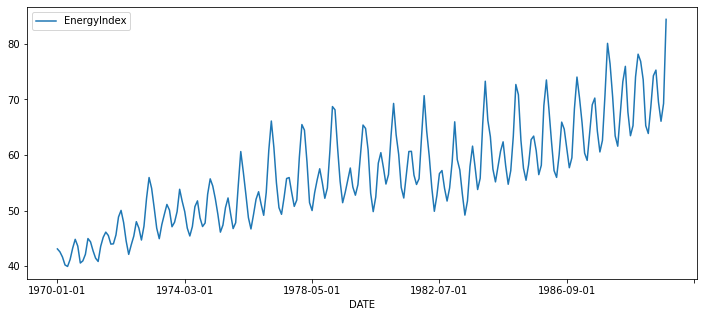

In [15]:
# Plotting the EnergyIndex
_=df.plot(figsize=(12,5))

In [26]:
# Adding a 12- month Simple Moving Average 
df['SMA_EnergyIndex'] = df['EnergyIndex'].rolling(window=12).mean()

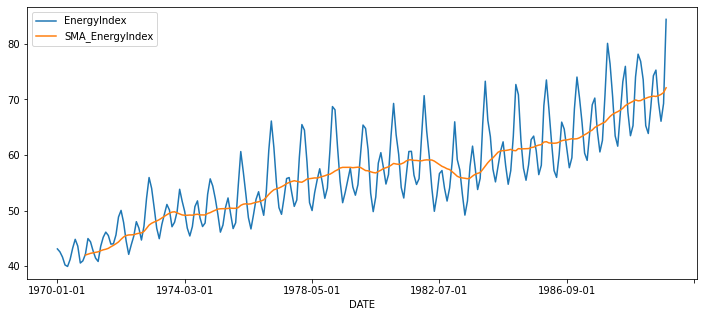

In [17]:
_=df.plot(figsize=(12,5))

In [30]:
# Adding a line trend of Exponential Weighted Moving Average(Double Exponential Smoothing model) of last 12 months span
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(12+1)
df['SES12_EnergyIndex'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level= alpha, optimized=False).fittedvalues.shift(-1)


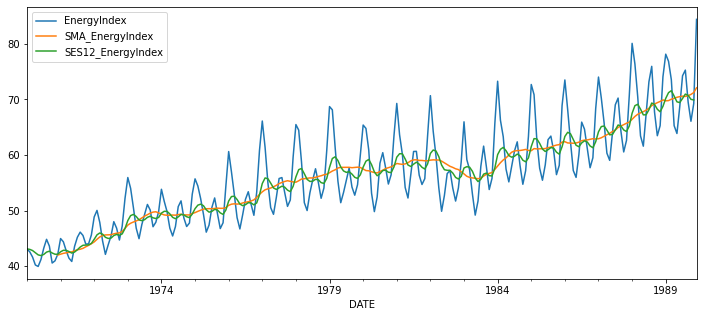

In [33]:
_=df.plot(figsize=(12,5))

In [29]:
# Add a line trend from HoltWinters Triple Exponentail Smoothing model with multipliative model

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
df['TES12_EnergyIndex'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
                #          ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

/Users/karthimohan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


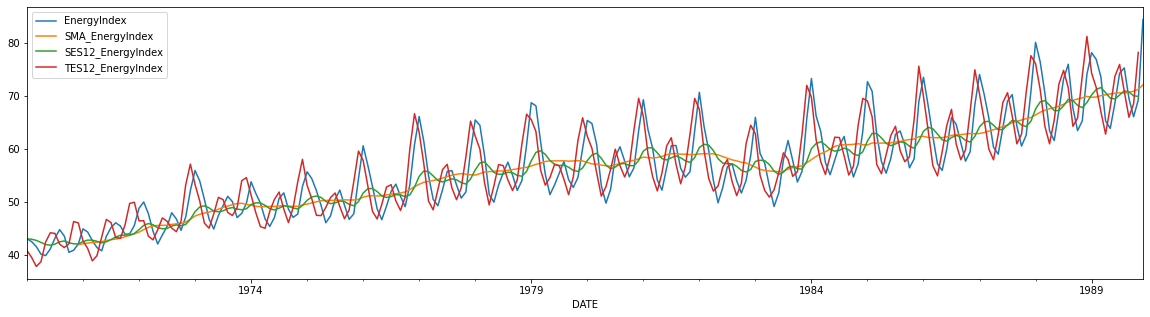

In [38]:
_=df.plot(figsize=(20,5))

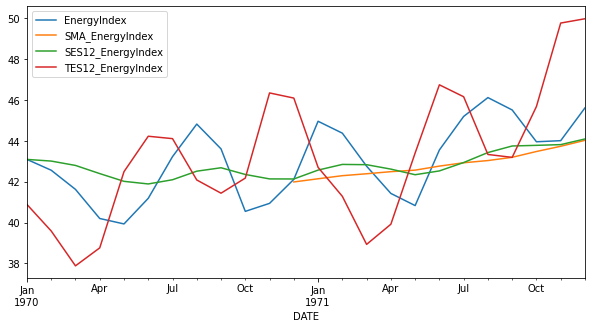

In [39]:
# Plotting first 2 years
df.iloc[:24].plot(figsize=(10,5))

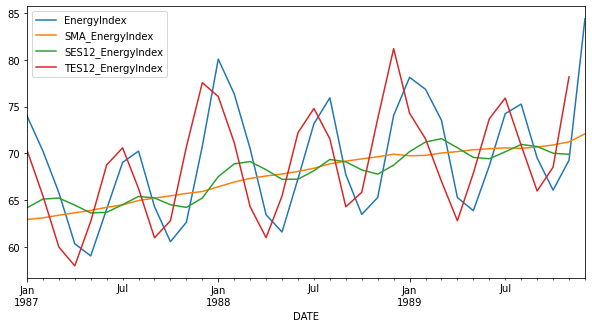

In [40]:
# Plotting last 3 years
df.iloc[-36:].plot(figsize=(10,5))

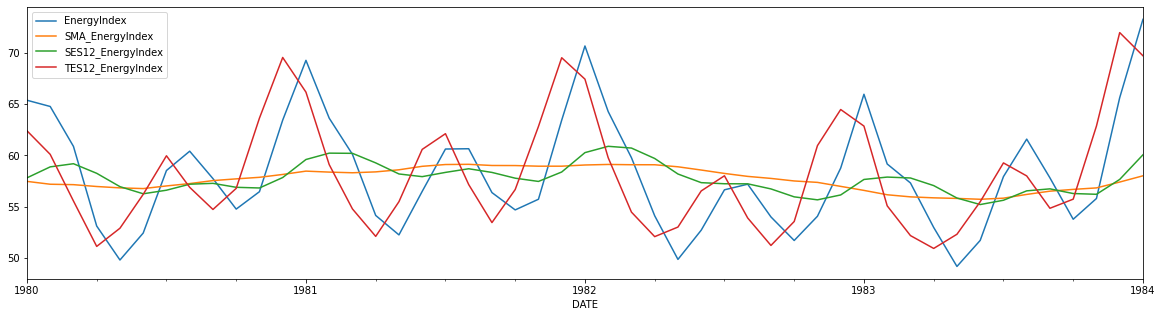

In [43]:
# Identifing  visible decline of EnergyIndex between 1982 and 1983
df.loc['1980-01-01':'1984-01-01'].plot(figsize=(20,5))